In [1]:
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import seaborn as sns 

In [4]:
import numpy as np 

In [5]:
from scipy.stats import norm 

In [6]:
from sklearn.preprocessing import StandardScaler  

In [7]:
from scipy import stats 

In [8]:
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
import gc

In [10]:
import os

In [11]:
import string

In [12]:
color = sns.color_palette()

In [17]:
%pip install plotly
from plotly import tools

Note: you may need to restart the kernel to use updated packages.


In [18]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [19]:
import plotly.graph_objs as go

In [20]:
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [22]:
from sklearn.decomposition import TruncatedSVD

In [24]:
%pip install lightgbm
import lightgbm as lgb

Note: you may need to restart the kernel to use updated packages.


In [25]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [27]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

Note: you may need to restart the kernel to use updated packages.


In [28]:
from bs4 import BeautifulSoup

In [29]:
import nltk

In [30]:
from nltk.corpus import stopwords

In [31]:
from nltk.stem.snowball import SnowballStemmer

In [32]:
import re

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn import metrics

In [41]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: initialization failed

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Conv1D

In [ ]:
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
from textblob import TextBlob

In [ ]:
from tqdm import tqdm

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import tensorflow.keras

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
import random

In [ ]:
from collections import defaultdict

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, BatchNormalization, Dropout

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df_train = pd.read_csv("drugsComTrain_raw.csv", parse_dates=["date"], nrows=80000)

In [ ]:
df_test = pd.read_csv("drugsComTest_raw.csv", parse_dates=["date"], nrows=20000)

In [ ]:
print("Train shape :" ,df_train.shape)
print("Test shape :", df_test.shape)

Train shape : (80000, 7)
Test shape : (20000, 7)


In [ ]:
print("unique values count of train : " ,len(set(df_train['uniqueID'].values)))
print("length of train : " ,df_train.shape[0])

unique values count of train :  80000
length of train :  80000


In [ ]:
df_all = pd.concat([df_train,df_test])

In [ ]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

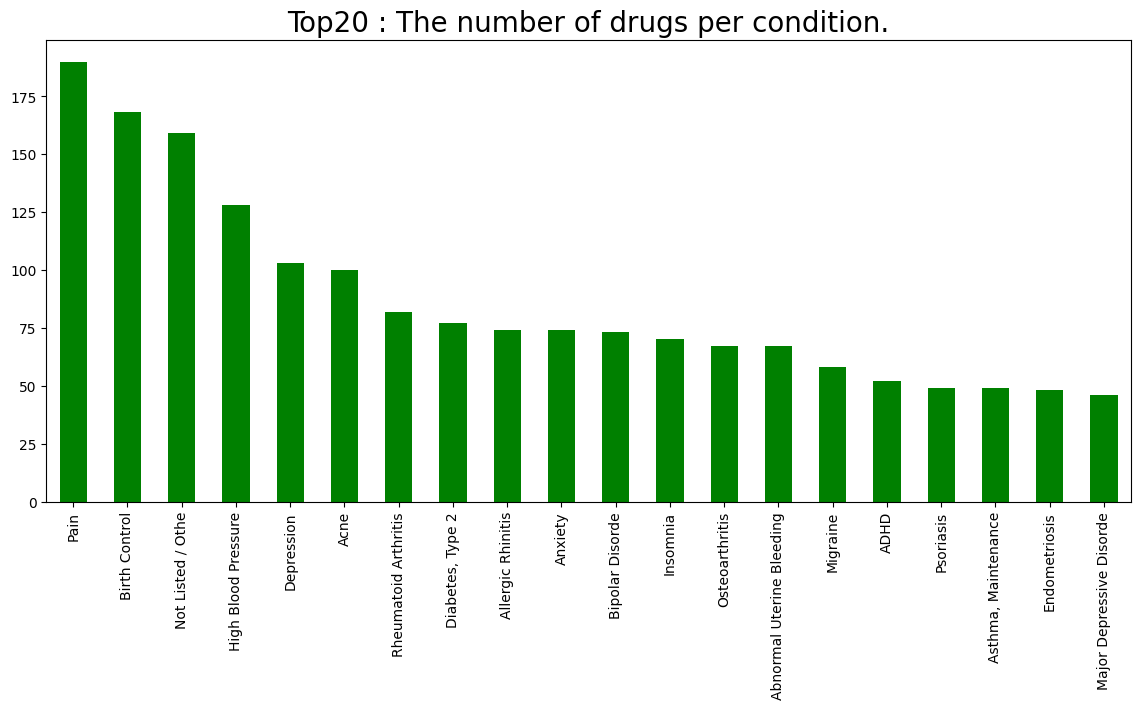

In [ ]:
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [ ]:
df_all[df_all['condition']=='3</span> users found this comment helpful.'].head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,2010-06-01,3
1864,124318,Skyla,3</span> users found this comment helpful.,"""Never pregnant,28,retroverted small (6cm) ute...",1,2015-12-16,3
3322,202848,ProAir HFA,3</span> users found this comment helpful.,"""I get chest colds and asthmatic symptoms in t...",9,2015-12-12,3


In [ ]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

Text(0.5, 1.0, 'Bottom20 : The number of drugs per condition.')

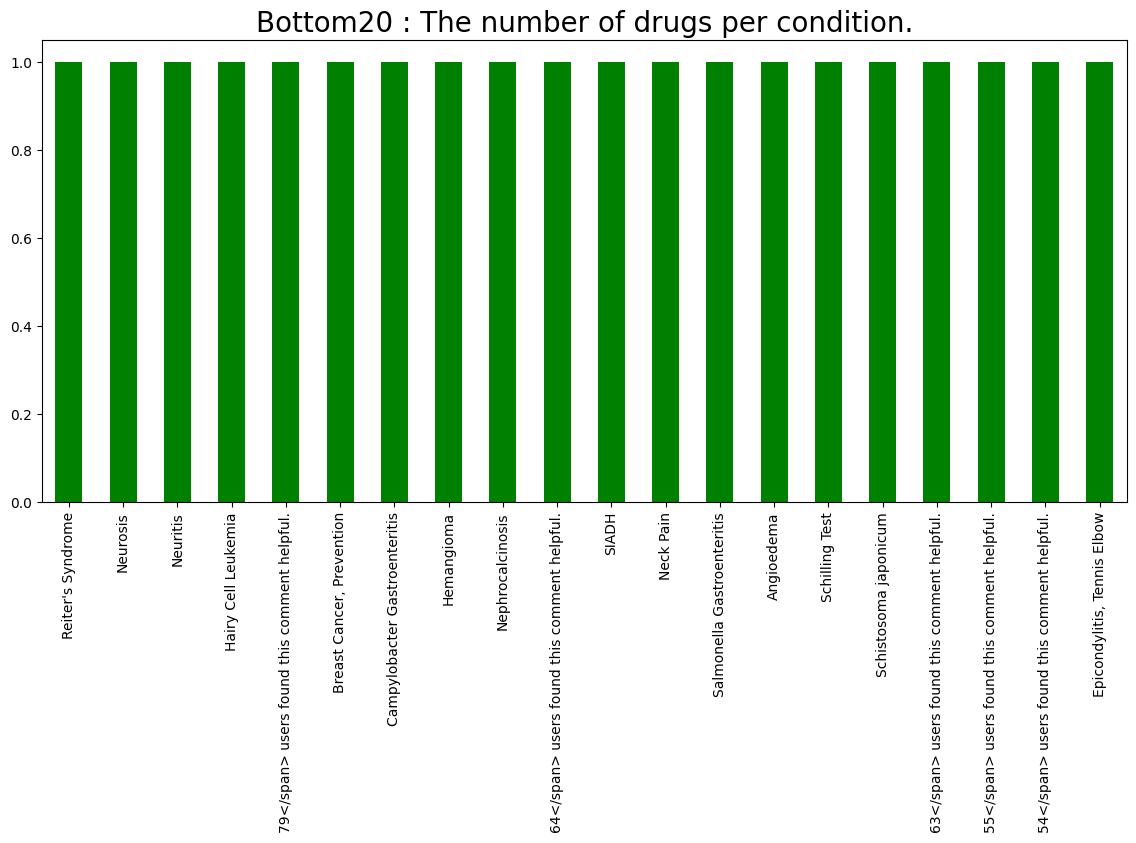

In [ ]:
condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 20)

In [ ]:
df_train['review'][1]

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [ ]:
df_train['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

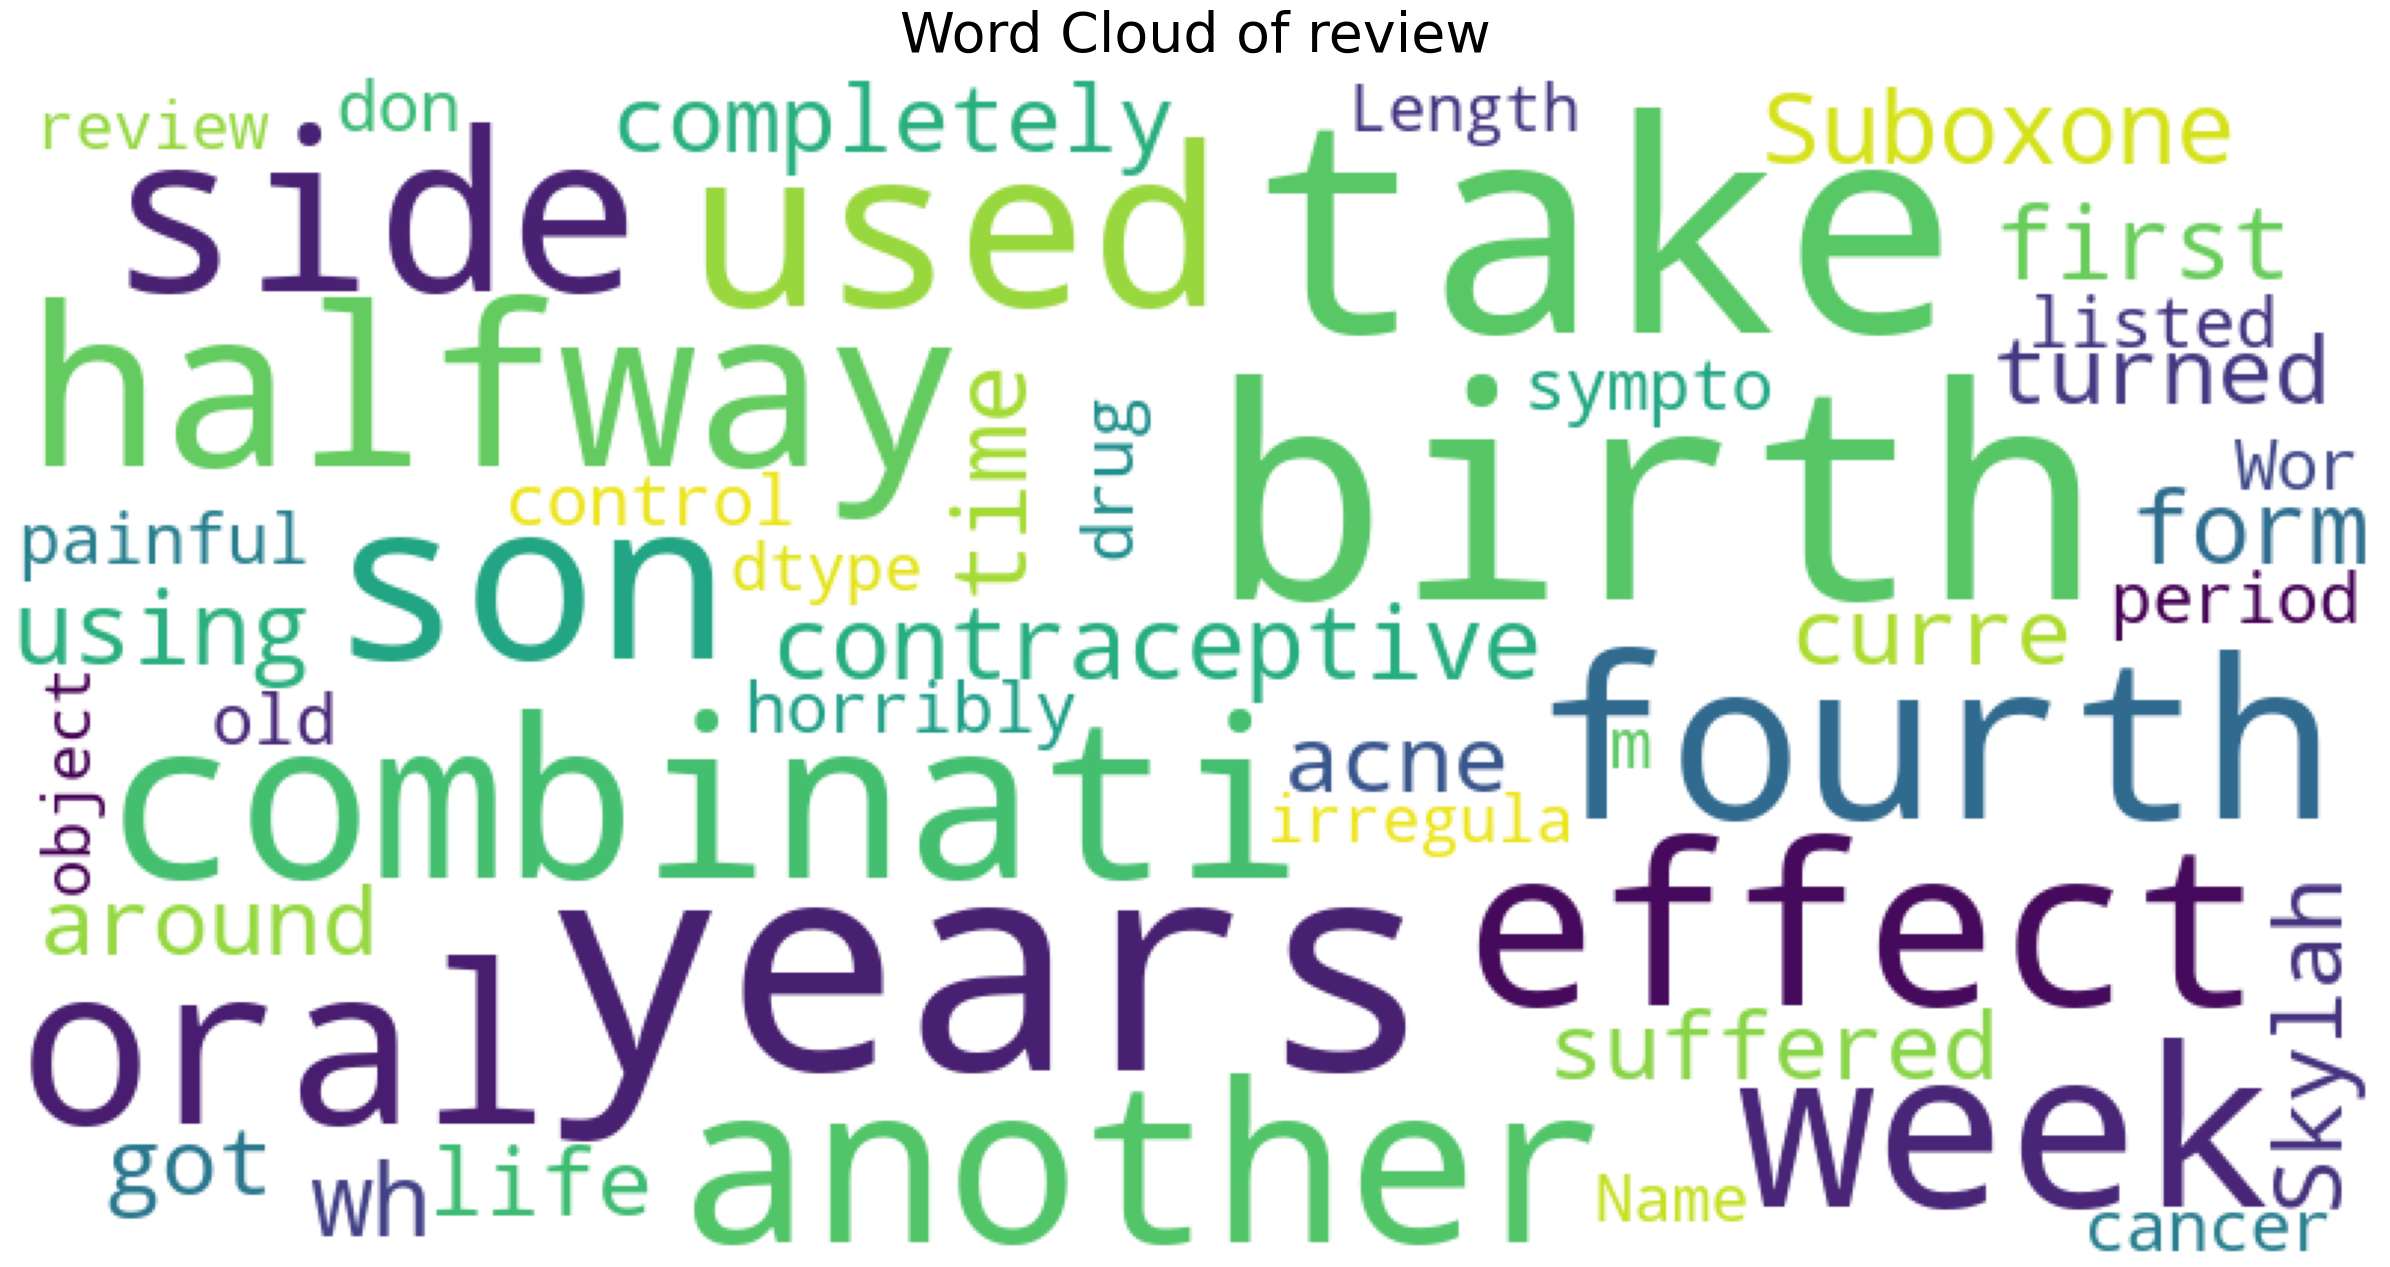

In [ ]:
plot_wordcloud(df_all["review"], title="Word Cloud of review")

In [ ]:
df_all_6_10 = df_all[df_all["rating"]>5]
df_all_1_5 = df_all[df_all["rating"]<6]

In [ ]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


In [ ]:
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [ ]:
freq_dict = defaultdict(int)

In [ ]:
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1

In [ ]:
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])

In [ ]:
fd_sorted.columns = ["word", "wordcount"]

In [ ]:
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

In [ ]:
freq_dict = defaultdict(int)

In [ ]:
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])

In [ ]:
fd_sorted.columns = ["word", "wordcount"]

In [ ]:
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating 1 to 5", 
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\91865\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
freq_dict = defaultdict(int)

In [ ]:
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1

In [ ]:
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])

In [ ]:
fd_sorted.columns = ["word", "wordcount"]

In [ ]:
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

In [ ]:
freq_dict = defaultdict(int)

In [ ]:
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1

In [ ]:
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])

In [ ]:
fd_sorted.columns = ["word", "wordcount"]

In [ ]:
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

In [ ]:
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of rating 1 to 5", 
                                          "Frequent biagrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\91865\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
freq_dict = defaultdict(int)

In [ ]:
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1

In [ ]:
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])

In [ ]:
fd_sorted.columns = ["word", "wordcount"]

In [ ]:
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

In [ ]:
freq_dict = defaultdict(int)

In [ ]:
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1

In [ ]:
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])

In [ ]:
fd_sorted.columns = ["word", "wordcount"]

In [ ]:
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'green')

In [ ]:
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent trigrams of rating 1 to 5", 
                                          "Frequent trigrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

In [ ]:
freq_dict = defaultdict(int)

In [ ]:
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1

In [ ]:
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])

In [ ]:
fd_sorted.columns = ["word", "wordcount"]

In [ ]:
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

In [ ]:
freq_dict = defaultdict(int)

In [ ]:
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1

In [ ]:
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])

In [ ]:
fd_sorted.columns = ["word", "wordcount"]

In [ ]:
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'red')

In [ ]:
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent 4-grams of rating 1 to 5", 
                                          "Frequent 4-grams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="4-grams Count Plots")
py.iplot(fig, filename='word-plots')

Text(0.5, 1.0, 'Count of rating values')

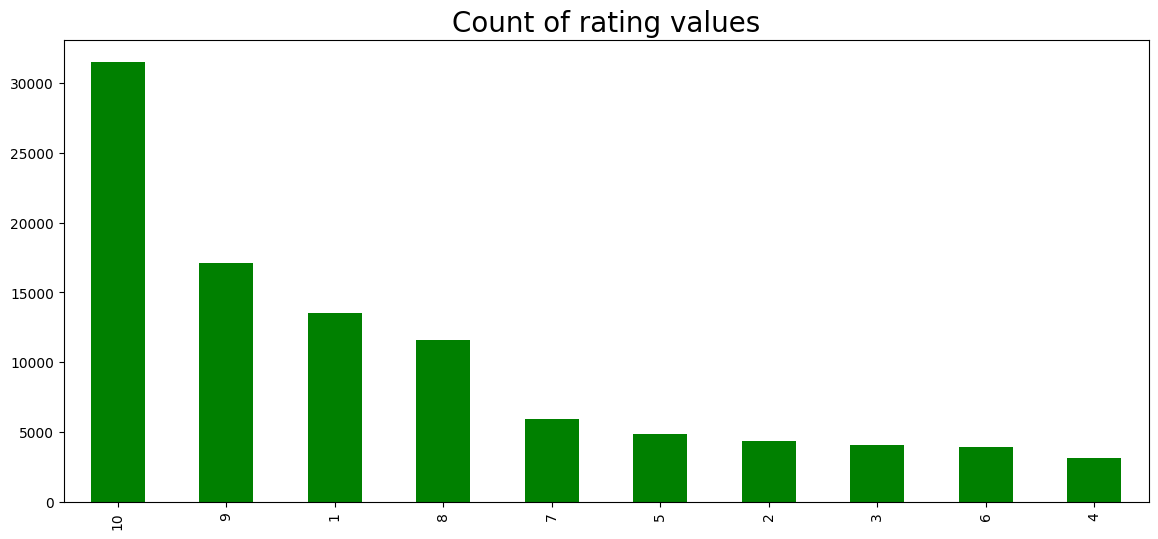

In [ ]:
rating = df_all['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

In [ ]:
cnt_srs = df_all['date'].dt.year.value_counts()

In [ ]:
cnt_srs = cnt_srs.sort_index()

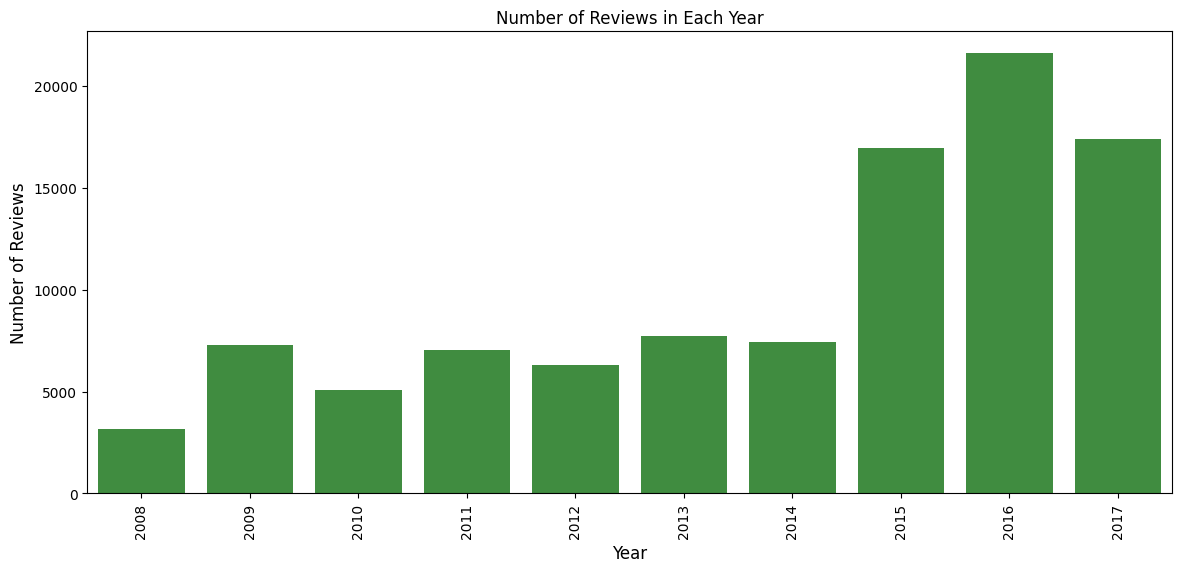

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Number of Reviews in Each Year')
plt.show()


In [ ]:
df_all['year'] = df_all['date'].dt.year

In [ ]:
rating = df_all.groupby('year')['rating'].mean()

Text(0.5, 1.0, 'Mean rating in year')

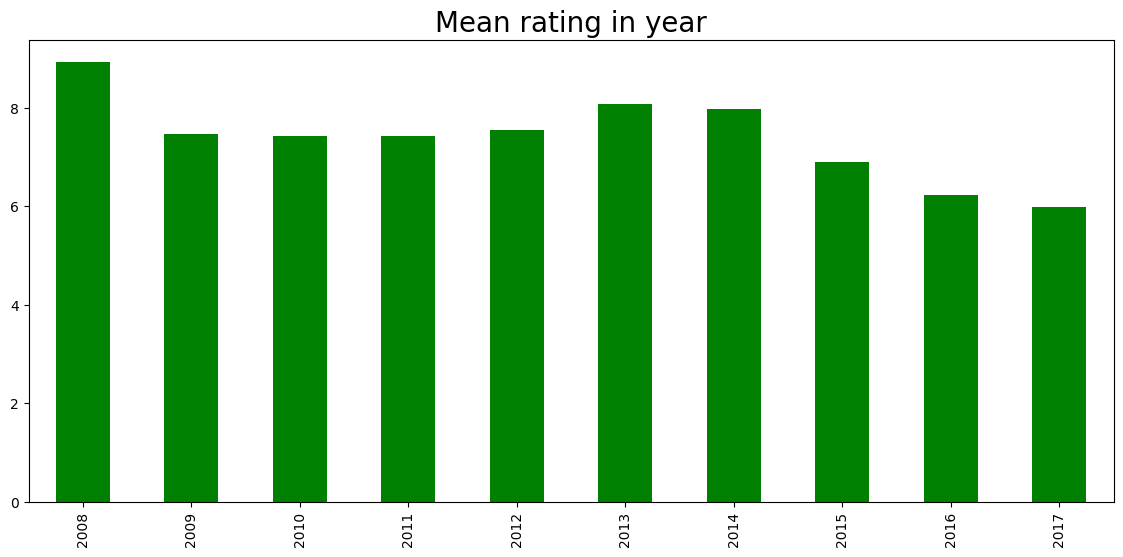

In [ ]:
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in year", fontsize = 20)

In [ ]:
cnt_srs = df_all['date'].dt.month.value_counts()

In [ ]:
cnt_srs = cnt_srs.sort_index()

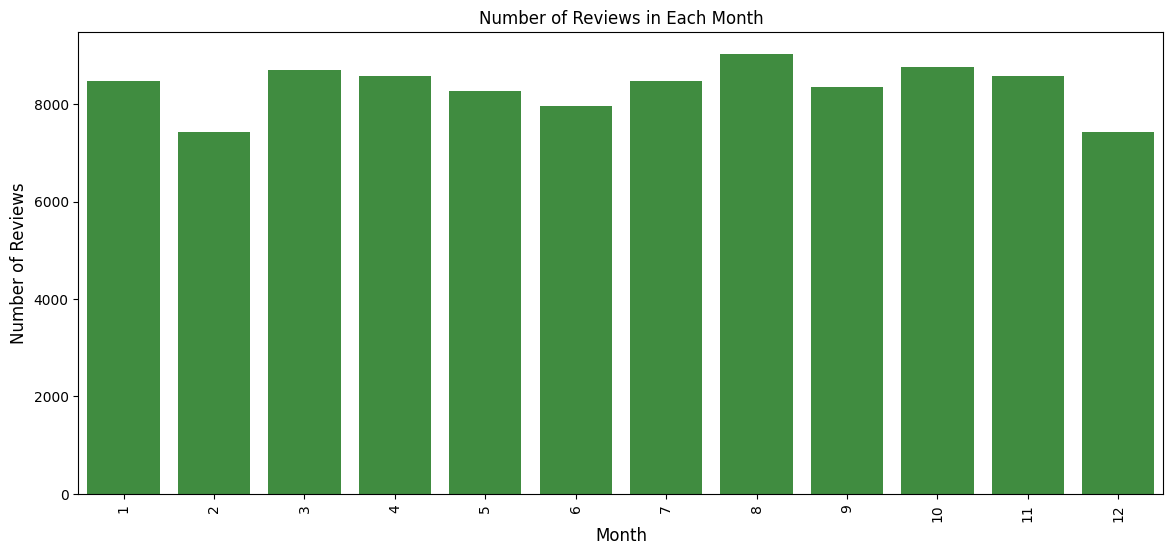

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Number of Reviews in Each Month')
plt.show()


In [ ]:
df_all['month'] = df_all['date'].dt.month

In [ ]:
rating = df_all.groupby('month')['rating'].mean()

Text(0.5, 1.0, 'Mean rating in month')

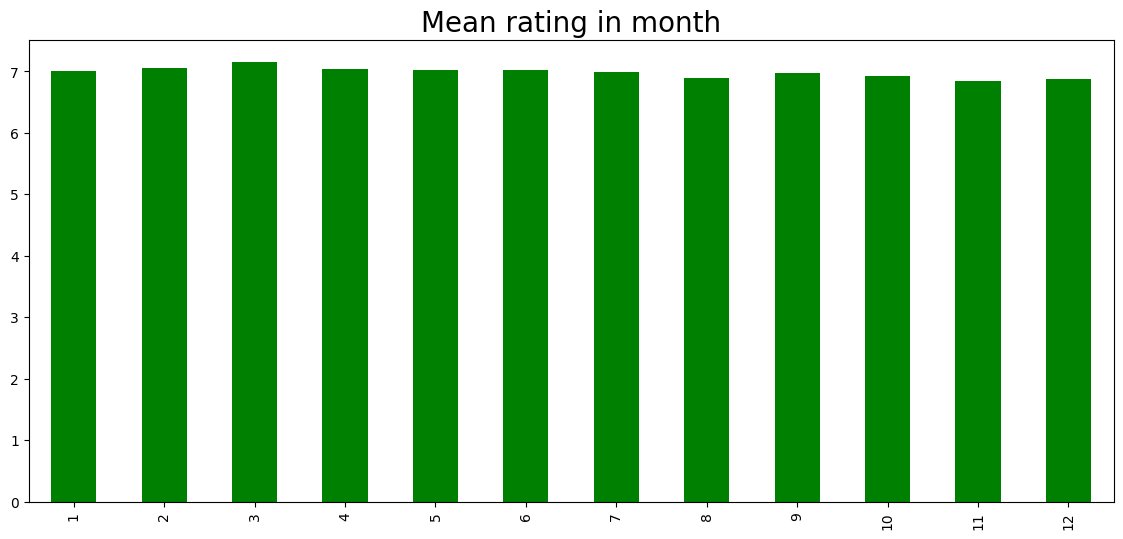

In [ ]:
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in month", fontsize = 20)

In [ ]:
df_all['day'] = df_all['date'].dt.day

In [ ]:
rating = df_all.groupby('day')['rating'].mean()

Text(0.5, 1.0, 'Mean rating in day')

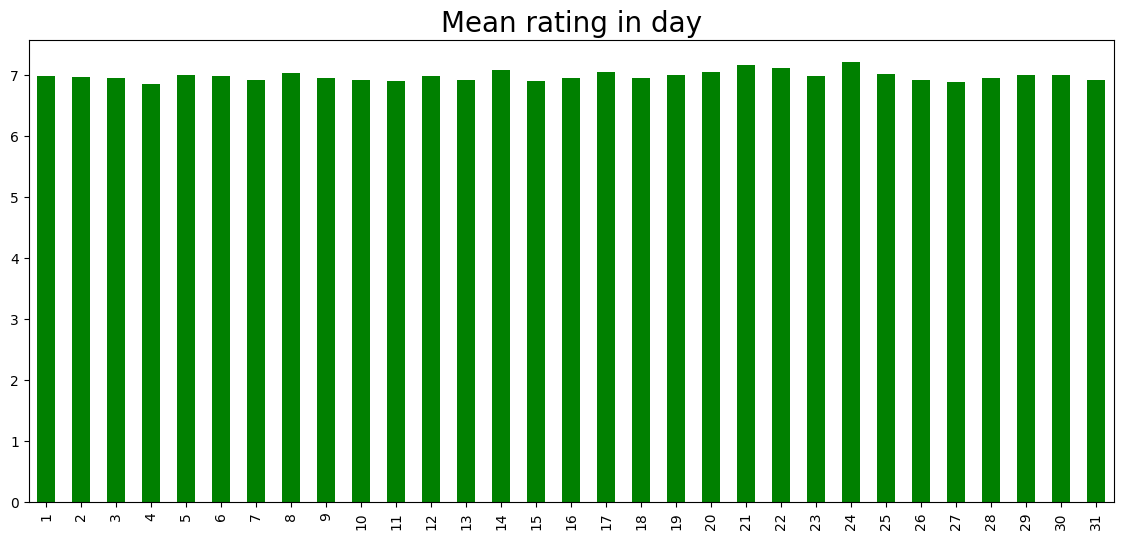

In [ ]:
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in day", fontsize = 20)

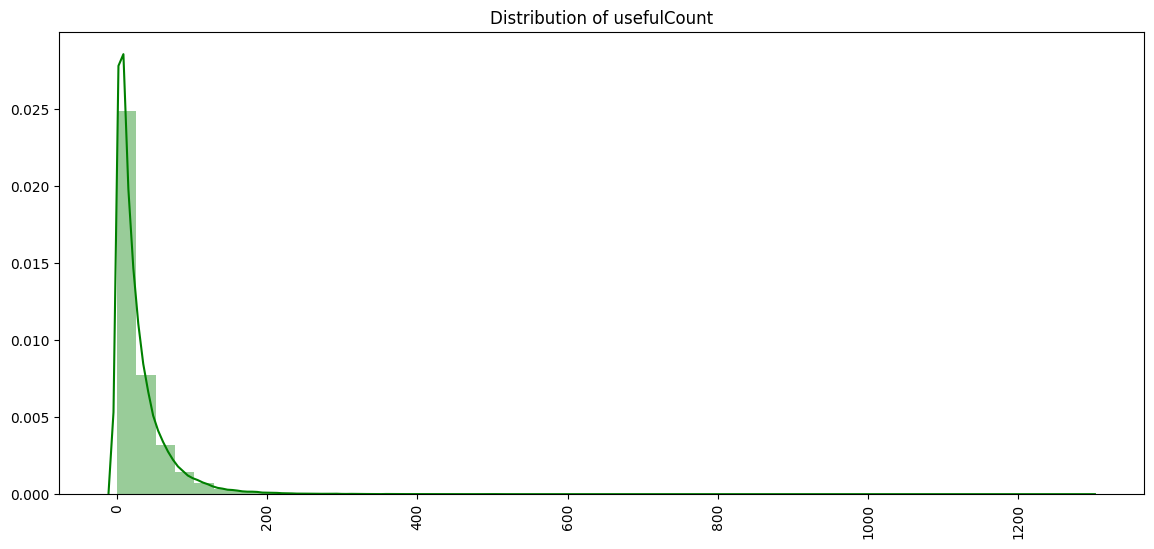

In [ ]:
plt.figure(figsize=(14,6))
sns.distplot(df_all["usefulCount"].dropna(),color="green")
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of usefulCount")
plt.show()

In [ ]:
df_all["usefulCount"].describe()

count    100000.000000
mean         28.099460
std          37.195411
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

In [ ]:
percent = (df_all.isnull().sum()).sort_values(ascending=False)

Text(0.5, 1.0, 'Total Missing Value ')

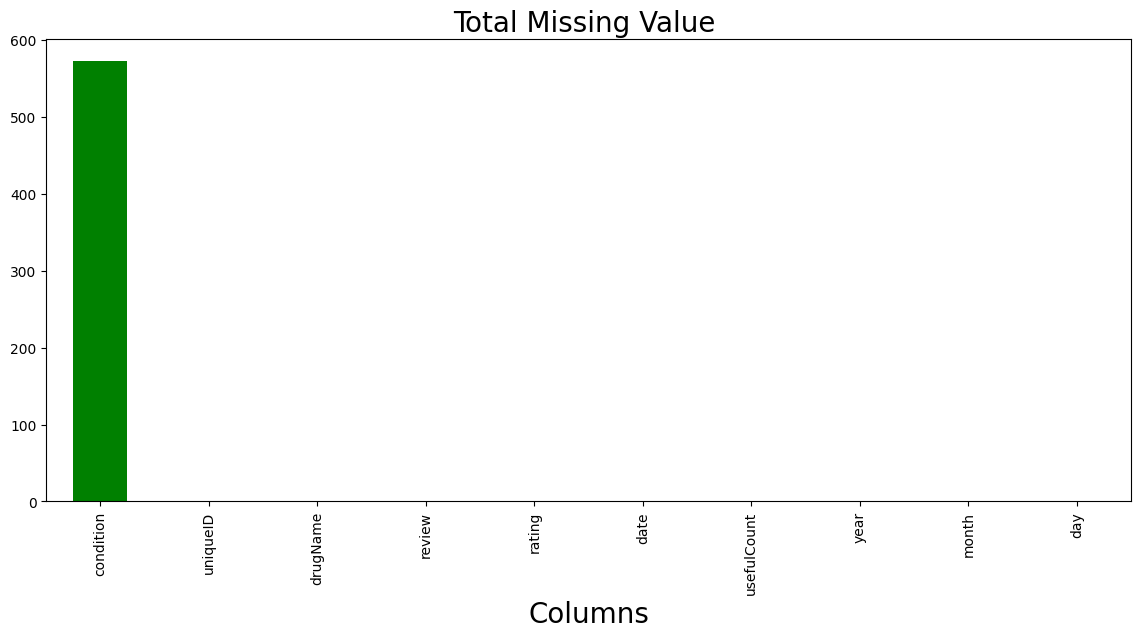

In [ ]:
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [ ]:
print("Missing value (%):", 1200/df_all.shape[0] *100)

Missing value (%): 1.2


In [ ]:
df_train = df_train.dropna(axis=0)

In [ ]:
df_test = df_test.dropna(axis=0)

In [ ]:
df_all = pd.concat([df_train,df_test]).reset_index()

In [ ]:
del df_all['index']

In [ ]:
percent = (df_all.isnull().sum()).sort_values(ascending=False)

Text(0.5, 1.0, 'Total Missing Value ')

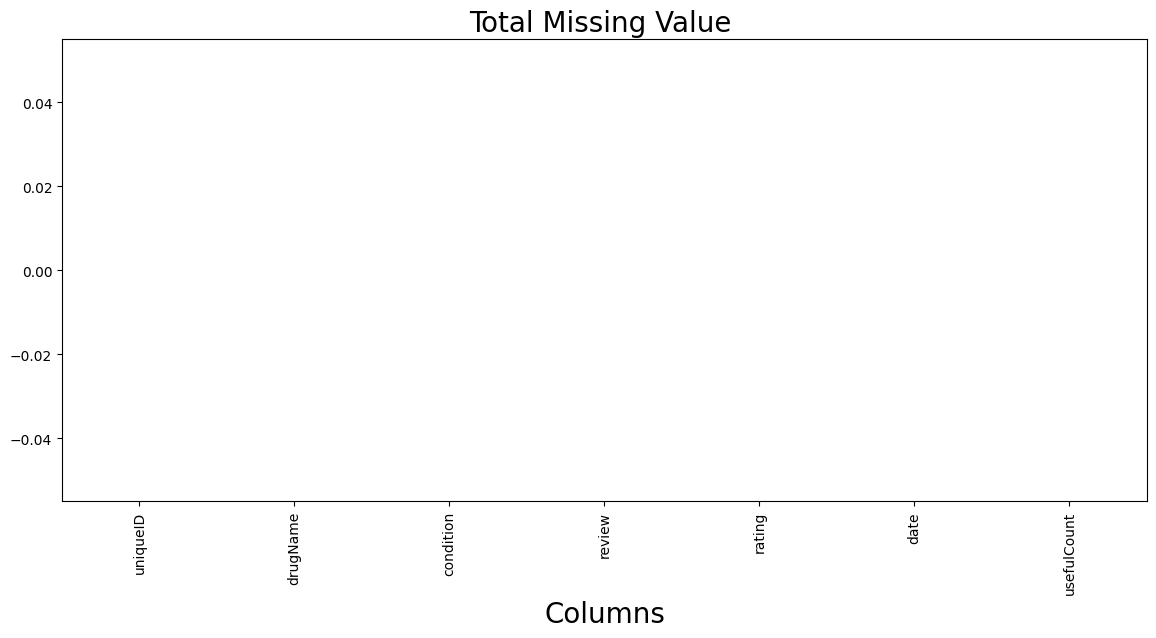

In [ ]:
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [ ]:
all_list = set(df_all.index)

In [ ]:
span_list = []

In [ ]:
for i,j in enumerate(df_all['condition']):
    if '</span>' in j:
        span_list.append(i)

In [ ]:
new_idx = all_list.difference(set(span_list))

In [ ]:
df_all = df_all.iloc[list(new_idx)].reset_index()

In [ ]:
del df_all['index']

In [ ]:
df_condition = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

In [ ]:
df_condition = pd.DataFrame(df_condition).reset_index()

In [ ]:
df_condition.tail(20)

,condition,drugName
727,Neck Pain,1
728,"Breast Cancer, Prevention",1
729,SIADH,1
730,Myxedema Coma,1
731,Salmonella Gastroenteritis,1
732,Myotonia Congenita,1
733,Myelofibrosis,1
734,Schistosoma japonicum,1
735,Bartonellosis,1
736,Body Imaging,1


In [ ]:
df_condition_1 = df_condition[df_condition['drugName']==1].reset_index()
df_condition_1['condition'][0:10]

0            min / rosiglitazone)
1                      Angioedema
2              min / sitagliptin)
3                   mance Anxiety
4                       Toothache
5              min / saxagliptin)
6              Anesthetic Adjunct
7                              me
8    Anemia, Chemotherapy Induced
9             min / pioglitazone)
Name: condition, dtype: object

In [ ]:
all_list = set(df_all.index)

In [ ]:
condition_list = []

In [ ]:
for i,j in enumerate(df_all['condition']):
    for c in list(df_condition_1['condition']):
        if j == c:
            condition_list.append(i)

In [ ]:
new_idx = all_list.difference(set(condition_list))

In [ ]:
df_all = df_all.iloc[list(new_idx)].reset_index()

In [ ]:
del df_all['index']

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

In [ ]:
stops = set(stopwords.words('english'))

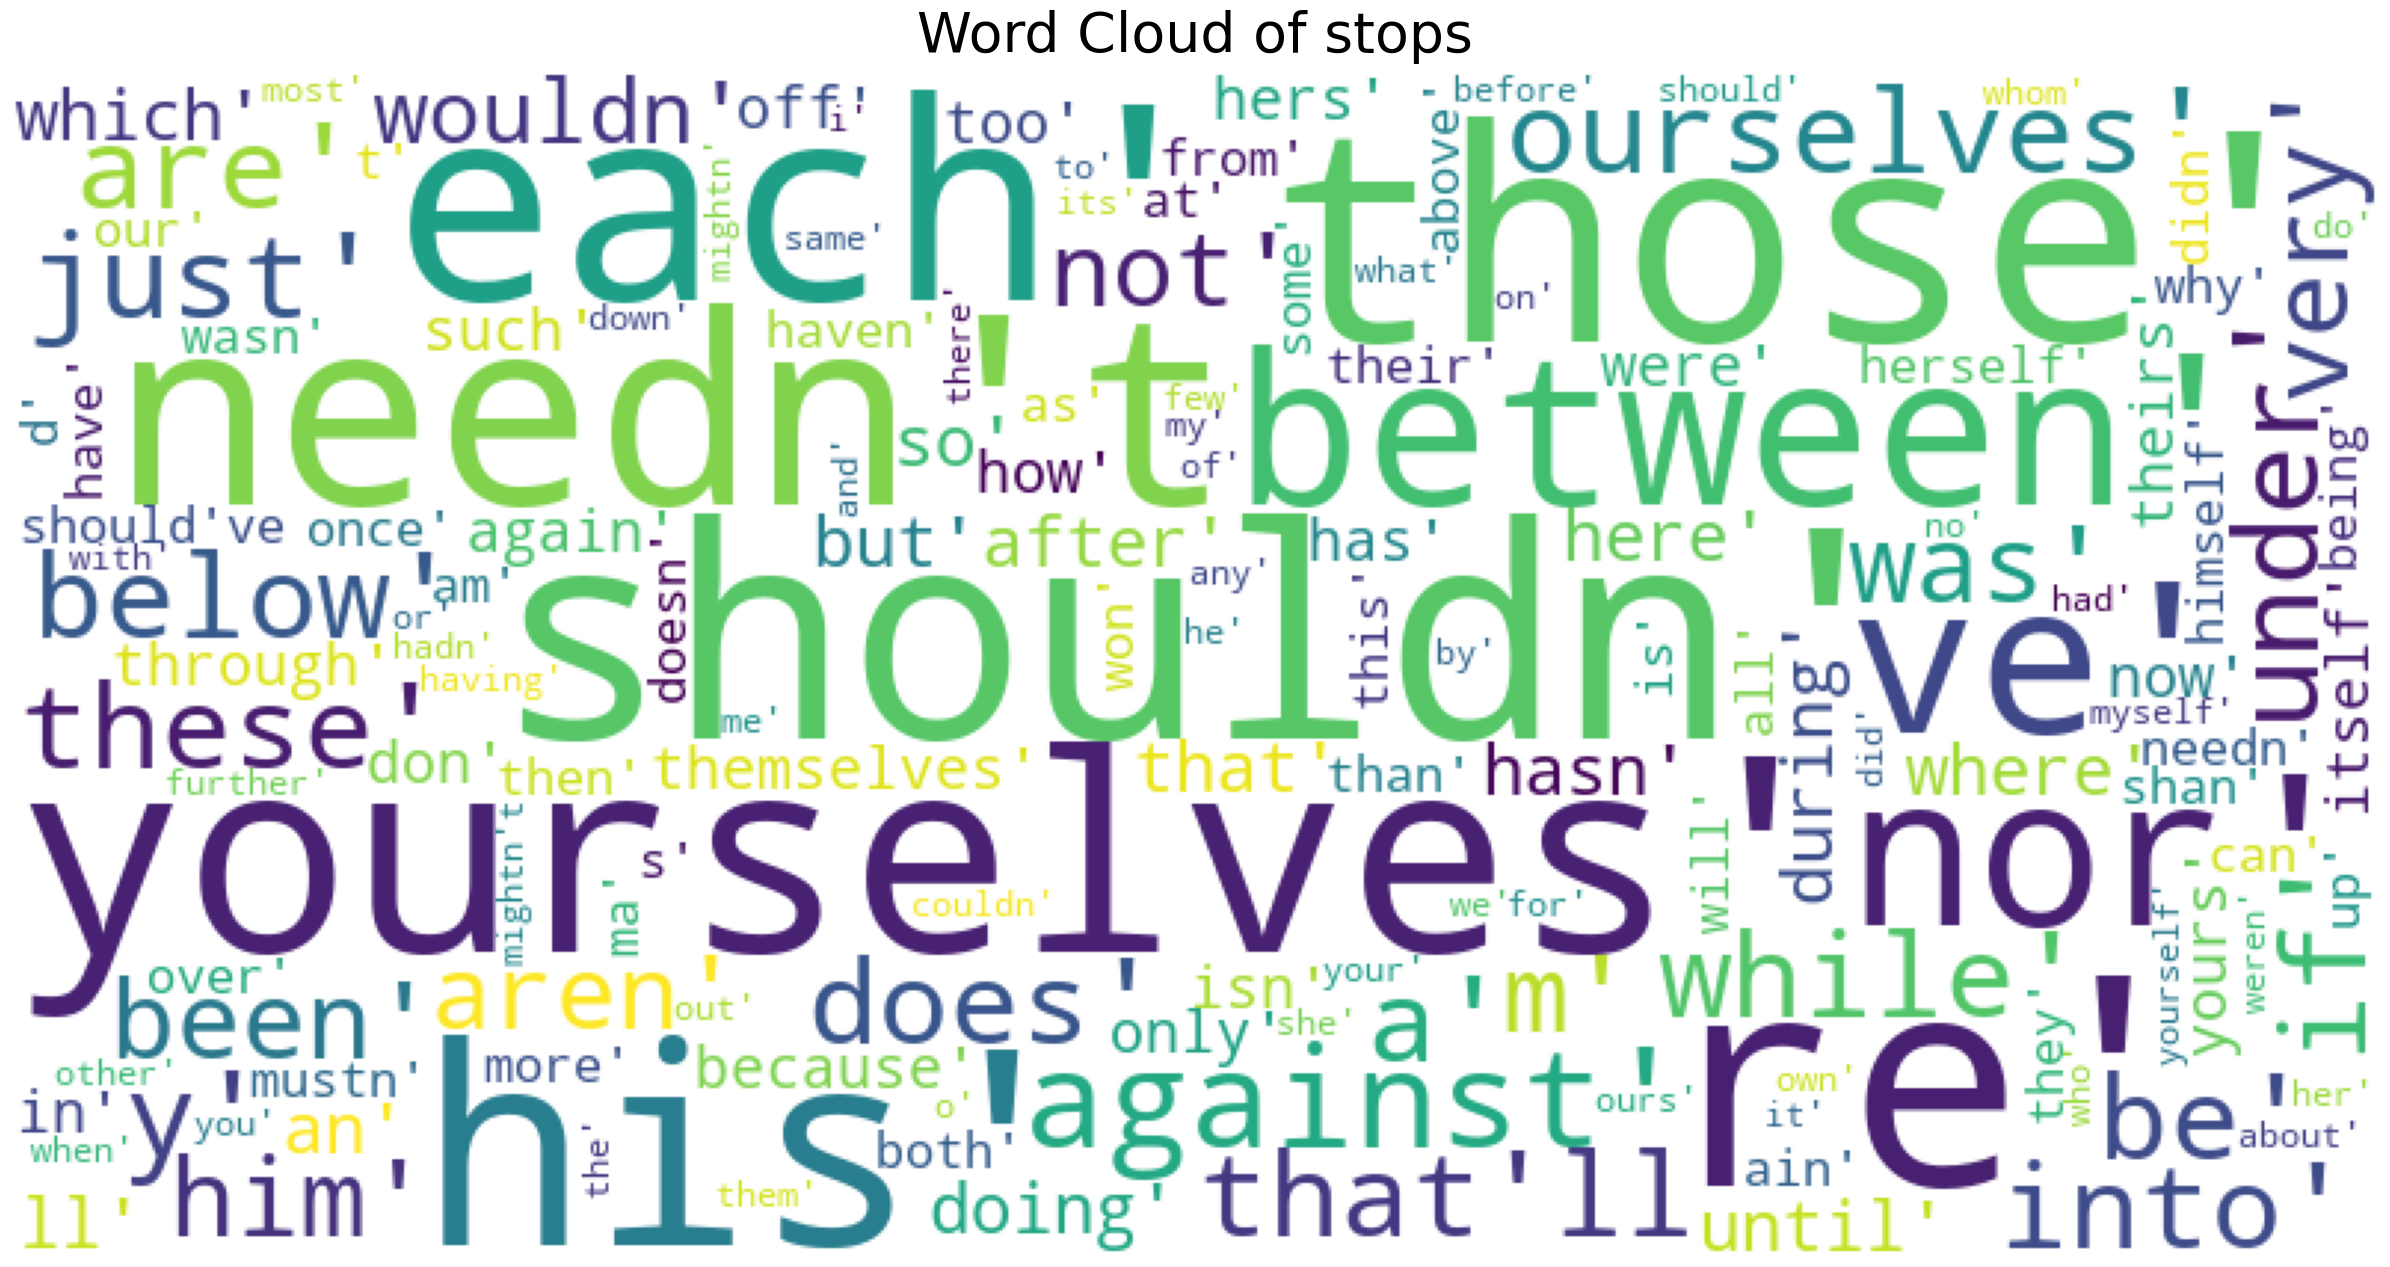

In [ ]:
plot_wordcloud(stops, title="Word Cloud of stops")

In [ ]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    words = letters_only.lower().split()
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return( ' '.join(stemming_words))

In [ ]:
%time df_all['review_clean'] = df_all['review'].apply(review_to_words)

CPU times: total: 33.2 s
Wall time: 49.8 s


In [ ]:
df_all['sentiment'] = df_all["rating"].apply(lambda x: 1 if x > 5 else 0)

In [ ]:
df_train, df_test = train_test_split(df_all, test_size=0.33, random_state=42) 

In [ ]:
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, 
                             ngram_range=(4, 4),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(4, 4))

In [ ]:
tf_vec = TfidfVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, 
                             ngram_range=(4, 4),
                             max_features = 20000)

In [ ]:
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [ ]:
%time train_data_features = pipeline.fit_transform(df_train['review_clean']).toarray()


CPU times: total: 6.73 s
Wall time: 12 s


In [ ]:
%time test_data_features = pipeline.fit_transform(df_test['review_clean']).toarray()

CPU times: total: 4.11 s
Wall time: 6.3 s


In [ ]:
y_train = df_train['sentiment']
y_test = df_test['sentiment']
solution = y_test.copy()

In [ ]:
len(train_data_features), train_data_features.shape, y_train.shape, test_data_features.shape

(65925, (65925, 20000), (65925,), (32472, 20000))

In [ ]:
model = Sequential()

model.add(Dense(200, input_shape=(20000,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(300))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               4000200   
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               60300     
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                       

In [ ]:
type(train_data_features)

numpy.ndarray

In [ ]:
hist = model.fit(train_data_features, y_train, epochs=10, batch_size=64)

MemoryError: Unable to allocate 9.82 GiB for an array with shape (65925, 20000) and data type int64

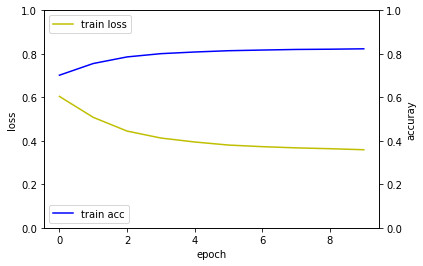

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [ ]:
loss_and_metrics = model.evaluate(test_data_features, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

1015/1015 [==============================] - 12s 11ms/step - loss: 1.2854 - accuracy: 0.6500
loss_and_metrics : [1.2853821516036987, 0.6499753594398499]


In [ ]:
sub_preds_deep = model.predict(test_data_features,batch_size=32)

1015/1015 [==============================] - 10s 5ms/step


In [ ]:
target = df_train['sentiment']
feats = ['usefulCount']


In [ ]:
sub_preds = np.zeros(df_test.shape[0])

In [ ]:
trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42) 
feature_importance_df = pd.DataFrame() 

In [ ]:
clf = LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.05,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )

In [ ]:
clf.fit(trn_x, trn_y, 
        eval_set= [(trn_x, trn_y), (val_x, val_y)], 
        verbose=100, early_stopping_rounds=100  #30
    )

[100]	training's binary_logloss: 0.5715	valid_1's binary_logloss: 0.570844


LGBMClassifier(learning_rate=0.05, max_depth=7, min_child_weight=2,
               min_split_gain=0.01, n_estimators=2000, num_leaves=30,
               reg_alpha=0.1, reg_lambda=0.1, silent=-1, subsample=0.9,
               verbose=-1)

In [ ]:
sub_preds = clf.predict(df_test[feats])

In [ ]:
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

In [ ]:
solution = df_test['sentiment']
confusion_matrix(y_pred=sub_preds, y_true=solution)

array([[    0,  9676],
       [    0, 22796]], dtype=int64)

In [ ]:
len_train = df_train.shape[0]
df_all = pd.concat([df_train,df_test])
del df_train, df_test;
gc.collect()

1849

In [ ]:
df_all['date'] = pd.to_datetime(df_all['date'])
df_all['day'] = df_all['date'].dt.day
df_all['year'] = df_all['date'].dt.year
df_all['month'] = df_all['date'].dt.month

In [ ]:
reviews = df_all['review_clean']

In [ ]:
Predict_Sentiment = []

In [ ]:
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]

100%|██████████████████████████████████████████████████████████████████████████| 98397/98397 [00:25<00:00, 3797.27it/s]


In [ ]:
df_all["Predict_Sentiment"] = Predict_Sentiment

In [ ]:
df_all.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,day,year,month,Predict_Sentiment
3624,230275,Meloxicam,Inflammatory Conditions,"""I had low intense back pain for 2 yrs. This d...",9,2017-08-29,5,low intens back pain yrs drug work great toler...,1,29,2017,8,0.300000
55489,219099,Subutex,Opiate Dependence,"""Prior to Subutex, I was taking Norco 80mg eve...",8,2013-04-07,82,prior subutex take norco mg everi hour awak ev...,1,7,2013,4,-0.072917
43456,155142,Metronidazole,Bacterial Vaginitis,"""This medicine works well. Has a terrible tast...",8,2016-05-11,13,medicin work well terribl tast got rid smell d...,1,11,2016,5,0.300000
11145,113415,Bisacodyl,Constipation,"""You HAVE to drink water with the pill(s) unle...",10,2014-11-28,69,drink water pill unless want serious cramp ser...,1,28,2014,11,-0.216667
13048,186945,Deltasone,Sarcoidosis,"""Feeling hyperactive like I can&#039;t walk fa...",6,2015-09-08,9,feel hyperact like walk fast enough wait thoug...,1,8,2015,9,0.189755


In [ ]:
np.corrcoef(df_all["Predict_Sentiment"], df_all["rating"])

array([[1.        , 0.25628657],
       [0.25628657, 1.        ]])

In [ ]:
np.corrcoef(df_all["Predict_Sentiment"], df_all["sentiment"])

array([[1.        , 0.23509774],
       [0.23509774, 1.        ]])

In [ ]:
reviews = df_all['review']

In [ ]:
Predict_Sentiment = []

In [ ]:
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]

100%|██████████████████████████████████████████████████████████████████████████| 98397/98397 [00:50<00:00, 1953.36it/s]


In [ ]:
df_all["Predict_Sentiment2"] = Predict_Sentiment

In [ ]:
np.corrcoef(df_all["Predict_Sentiment2"], df_all["rating"])

array([[1.        , 0.34935632],
       [0.34935632, 1.        ]])

In [ ]:
np.corrcoef(df_all["Predict_Sentiment2"], df_all["sentiment"])

array([[1.        , 0.31861944],
       [0.31861944, 1.        ]])

In [ ]:
df_all['count_sent']=df_all["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)

In [ ]:
df_all['count_word']=df_all["review_clean"].apply(lambda x: len(str(x).split()))

In [ ]:
df_all['count_unique_word']=df_all["review_clean"].apply(lambda x: len(set(str(x).split())))

In [ ]:
df_all['count_letters']=df_all["review_clean"].apply(lambda x: len(str(x)))

In [ ]:
df_all["count_punctuations"] = df_all["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [ ]:
df_all["count_words_upper"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

In [ ]:
df_all["count_words_title"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

In [ ]:
df_all["count_stopwords"] = df_all["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

In [ ]:
df_all["mean_word_len"] = df_all["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
df_all['season'] = df_all["month"].apply(lambda x: 1 if ((x>2) & (x<6)) else(2 if (x>5) & (x<9) else (3 if (x>8) & (x<12) else 4)))

In [ ]:
df_train = df_all[:len_train]
df_test = df_all[len_train:]

In [ ]:
target = df_train['sentiment']
feats = ['usefulCount','day','year','month','Predict_Sentiment','Predict_Sentiment2', 'count_sent',
 'count_word', 'count_unique_word', 'count_letters', 'count_punctuations',
 'count_words_upper', 'count_words_title', 'count_stopwords', 'mean_word_len', 'season']

In [ ]:
sub_preds = np.zeros(df_test.shape[0])

In [ ]:
trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42) 
feature_importance_df = pd.DataFrame() 

In [ ]:
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )

In [ ]:
clf.fit(trn_x, trn_y, 
        eval_set= [(trn_x, trn_y), (val_x, val_y)], 
        verbose=100, early_stopping_rounds=100  #30
    )

[100]	training's binary_logloss: 0.469369	valid_1's binary_logloss: 0.495921
[200]	training's binary_logloss: 0.44077	valid_1's binary_logloss: 0.492575
[300]	training's binary_logloss: 0.417451	valid_1's binary_logloss: 0.49085
[400]	training's binary_logloss: 0.396009	valid_1's binary_logloss: 0.488899
[500]	training's binary_logloss: 0.376949	valid_1's binary_logloss: 0.487859
[600]	training's binary_logloss: 0.358848	valid_1's binary_logloss: 0.486351
[700]	training's binary_logloss: 0.3408	valid_1's binary_logloss: 0.485864
[800]	training's binary_logloss: 0.325394	valid_1's binary_logloss: 0.485733
[900]	training's binary_logloss: 0.310046	valid_1's binary_logloss: 0.484378
[1000]	training's binary_logloss: 0.296305	valid_1's binary_logloss: 0.483377
[1100]	training's binary_logloss: 0.283353	valid_1's binary_logloss: 0.483195


LGBMClassifier(max_depth=7, min_child_weight=2, min_split_gain=0.01,
               n_estimators=10000, num_leaves=30, reg_alpha=0.1, reg_lambda=0.1,
               silent=-1, subsample=0.9, verbose=-1)

In [ ]:
sub_preds = clf.predict(df_test[feats])
        
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

In [ ]:
confusion_matrix(y_pred=sub_preds, y_true=solution)

array([[ 4545,  5131],
       [ 2334, 20462]], dtype=int64)

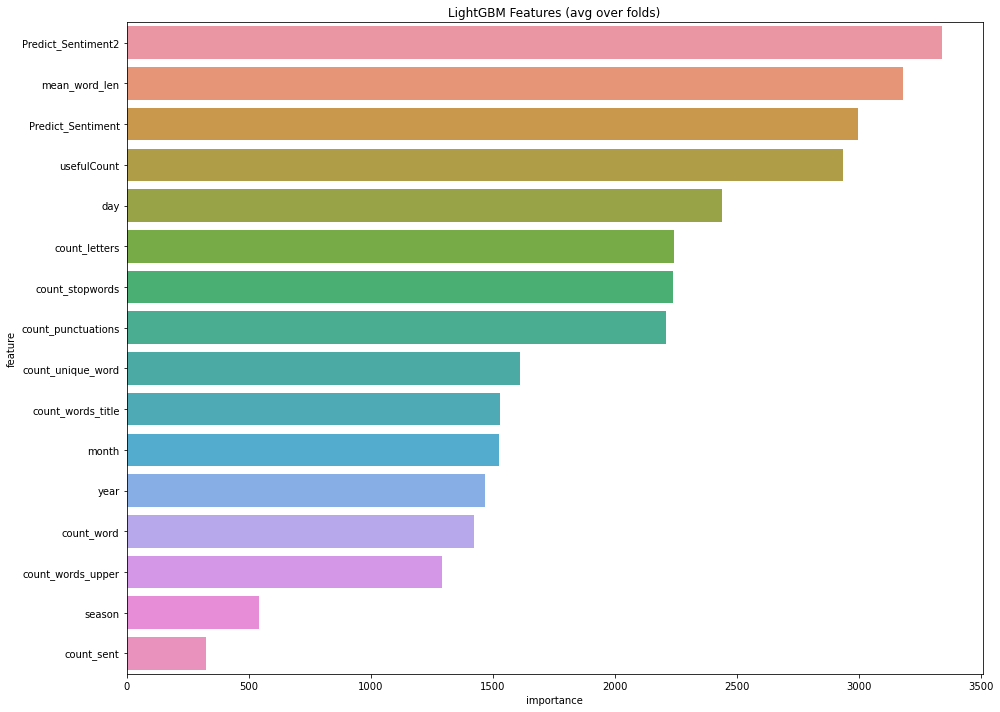

In [ ]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [ ]:
word_table = pd.read_csv("inquirerbasic.csv")

In [ ]:
word_table.head()

,Entry,Source,Positiv,Negativ
0,A,H4Lvd,NaN,NaN
1,ABANDON,H4Lvd,NaN,Negativ
2,ABANDONMENT,H4,NaN,Negativ
3,ABATE,H4Lvd,NaN,Negativ
4,ABATEMENT,Lvd,NaN,NaN


In [ ]:
temp_Positiv = []

In [ ]:
Positiv_word_list = []

In [ ]:
for i in range(0,len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Positiv.append(temp2)

In [ ]:
Positiv_word_list = list(set(temp_Positiv))

In [ ]:
len(temp_Positiv)

1915

In [ ]:
len(Positiv_word_list)

1637

In [ ]:
temp_Negativ = []

In [ ]:
Negativ_word_list = []

In [ ]:
for i in range(0,len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Negativ.append(temp2)

In [ ]:
Negativ_word_list = list(set(temp_Negativ))

In [ ]:
len(temp_Negativ)

2291

In [ ]:
len(Negativ_word_list)

2006

In [ ]:
vectorizer = CountVectorizer(vocabulary = Positiv_word_list)
content = df_test['review_clean']
X = vectorizer.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
df_test["num_Positiv_word"] = f.sum(axis=1)

In [ ]:
vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = df_test['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
df_test["num_Negativ_word"] = f2.sum(axis=1)

In [ ]:
df_test["Positiv_ratio"] = df_test["num_Positiv_word"]/(df_test["num_Positiv_word"]+df_test["num_Negativ_word"])
df_test["sentiment_by_dic"] = df_test["Positiv_ratio"].apply(lambda x: 1 if (x>=0.5) else (0 if (x<0.5) else 0.5))

df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,day,year,month,Predict_Sentiment,Predict_Sentiment2,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,season,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic
1549,57400,Oxymorphone,Pain,"""I have been on pain medicines since 1993 for ...",2,2010-06-27,27,pain medicin sinc back pain take oxycontin mg ...,0,27,2010,6,0.000000,0.000000,1,47,37,280,13,7,17,53,4.978723,2,4.0,10.0,0.285714,0.0
47760,104075,Ethinyl estradiol / levonorgestrel,Birth Control,"""I&#039;ve been on Sronyx for 4 weeks now and ...",6,2013-11-10,0,sronyx week far thing notic increas acn breako...,1,10,2013,11,-0.300000,0.040000,1,21,21,127,19,0,2,19,5.095238,3,NaN,NaN,NaN,0.5
28729,98829,Nexplanon,Birth Control,"""Got the Nexplanon at the end of November 2013...",7,2013-04-02,2,got nexplanon end novemb got cycl decemb light...,1,2,2013,4,0.032292,0.067083,1,62,51,339,32,10,20,78,4.483871,1,8.0,1.0,0.888889,1.0
97564,37535,Vyvanse,ADHD,"""I think it might be just as good as Adderall....",9,2011-08-25,1,think might good adderal tell fulli yet total ...,1,25,2011,8,0.266667,0.266667,1,14,14,82,12,4,5,12,4.928571,2,NaN,NaN,NaN,0.5
18122,22060,Infliximab,Ankylosing Spondylitis,"""My first go around in 2008 was like a miracle...",9,2011-02-03,29,first go around like miracl no side effect inf...,1,3,2011,2,-0.011772,0.047917,1,74,63,417,25,5,18,59,4.648649,4,2.0,1.0,0.666667,1.0


In [ ]:
def userful_count(data):
    grouped = data.groupby(['condition']).size().reset_index(name='user_size')
    data = pd.merge(data,grouped,on='condition',how='left')
    return data

In [ ]:
df_test =  userful_count(df_test) 
df_test['usefulCount'] = df_test['usefulCount']/df_test['user_size']

In [ ]:
df_test['deep_pred'] = sub_preds_deep
df_test['machine_pred'] = sub_preds

In [ ]:
df_test['total_pred'] = (df_test['deep_pred'] + df_test['machine_pred'] + df_test['sentiment_by_dic'])*df_test['usefulCount']

In [ ]:
df_test = df_test.groupby(['condition','drugName']).agg({'total_pred' : ['mean']})
df_test

total_pred
                                                                             mean
condition                drugName                                                
ADHD                     Adderall                                        0.120662
                         Adderall XR                                     0.106699
                         Adzenys XR-ODT                                  0.031637
                         Amphetamine                                     0.035156
                         Amphetamine / dextroamphetamine                 0.102472
...                                                                           ...
t Care                   Salicylic acid / urea                           0.000000
                         Salvax Duo                                      0.000000
von Willebrand's Disease Antihemophilic factor / von willebrand factor   0.000000
                         Stimate                                         3.877823
zen Shoulde              Diclofenac                                     21.372476

[4154 rows x 1 columns]